<a href="https://colab.research.google.com/github/KeremAydin98/autobots-roll-out/blob/main/textClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [2]:
from datasets import list_datasets

In [3]:
datasets = list_datasets()
metadata = list_datasets(with_details=True)[datasets.index('emotion')]

In [4]:
print("Description:\n", metadata.description)

Description:
 Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper.


In [5]:
from datasets import load_dataset

In [6]:
emotion = load_dataset('emotion')

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
type(emotion)

datasets.dataset_dict.DatasetDict

In [8]:
train_ds = emotion["train"]
test_ds = emotion["test"]

In [9]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [10]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [11]:
import pandas as pd

emotion.set_format(type="pandas")
df = emotion["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def int2label(row, split):

  return emotion[split].features["label"].int2str(row)

df["label name"] = df["label"].apply(int2label, split="train")

In [13]:
df.head()

,text,label,label name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


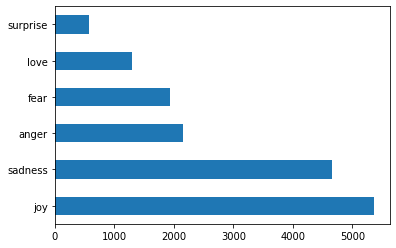

In [14]:
import matplotlib.pyplot as plt

df["label name"].value_counts().plot.barh()

### Character Tokenization

In [15]:
text = "Tokenizing text is a core task of NLP."

tokenized_text = list(text)

tokenized_text

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

In [16]:
token2idx = {}

for idx, unique_char in enumerate(set(tokenized_text)):

  token2idx[unique_char]  = idx

print(token2idx) 

{'e': 0, ' ': 1, 'i': 2, 'x': 3, 's': 4, 'k': 5, 'r': 6, 'c': 7, 'T': 8, 'o': 9, 't': 10, '.': 11, 'P': 12, 'f': 13, 'g': 14, 'N': 15, 'n': 16, 'a': 17, 'L': 18, 'z': 19}


In [17]:
input_id = [token2idx[token] for token in tokenized_text]
input_id

[8,
 9,
 5,
 0,
 16,
 2,
 19,
 2,
 16,
 14,
 1,
 10,
 0,
 3,
 10,
 1,
 2,
 4,
 1,
 17,
 1,
 7,
 9,
 6,
 0,
 1,
 10,
 17,
 4,
 5,
 1,
 9,
 13,
 1,
 15,
 18,
 12,
 11]

In [18]:
import torch

input_ids = torch.tensor(input_id)
onehot_input = torch.nn.functional.one_hot(input_ids)

### Word Tokenization

In [19]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


# Using Pretrained Tokenizer

In [ ]:
!pip install transformers

In [22]:
from transformers import AutoTokenizer 

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [23]:
tokenizer.vocab_size

30522

In [24]:
encoded_str = tokenizer.encode("This is a complicated translation")
print(encoded_str)

[101, 2023, 2003, 1037, 8552, 5449, 102]


In [25]:
decoded_str = tokenizer.decode(encoded_str)
print(decoded_str)

[CLS] this is a complicated translation [SEP]
